# Investigating Gender Income Equality in Recent College Graduates 

This section analyzed gender difference in median income for different majors among recent college graduates.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collegetools import gender_tool as gt

In [2]:
# Load recent_grads data from 2010 to 2018
recent_grads_10 = pd.read_csv("data/pums/processed/2010_recent_grad_stats_by_major.csv")
recent_grads_12 = pd.read_csv("data/pums/processed/2012_recent_grad_stats_by_major.csv")
recent_grads_14 = pd.read_csv("data/pums/processed/2014_recent_grad_stats_by_major.csv")
recent_grads_16 = pd.read_csv("data/pums/processed/2016_recent_grad_stats_by_major.csv")
recent_grads_18 = pd.read_csv("data/pums/processed/2018_recent_grad_stats_by_major.csv")

women_stem = pd.read_csv("data/fivethirtyeight/women-stem.csv")

In [3]:
# Make a list of dataframes
recent_grads_raw = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]

In [4]:
# Drop rows with N/A
recent_grads = [df[(df[['women median','men median']] > 0).all(axis=1)] for df in recent_grads_raw]

### Plotting the Overall Women and Men Income Across Time

In [5]:
# Calculate average median income of all majors respectively for women and men
women_avg_income = [np.mean(df['women median']) for df in recent_grads]
men_avg_income = [np.mean(df['men median']) for df in recent_grads]

Text(0.5, 1.0, 'Mean of median income for women and men recent graduates with all majors')

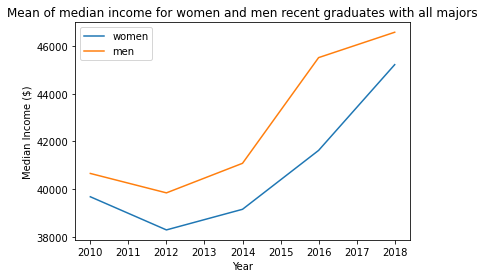

In [6]:
# Make a line plot showing the trend of averge income for women and men from 2010 to 2018
year = [2010, 2012, 2014, 2016, 2018]
plt.plot(year, women_avg_income, label = "women")
plt.plot(year, men_avg_income, label = "men")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.title("Mean of median income for women and men recent graduates with all majors")

This plot shows the average of median income for each major respectively for men and women. The income gap had persisted from 2010 to 2018, and expanded from 2010 to 2016, even though income of both groups have increased. 

## Gender Income Differences for Major

In [7]:
# Calculate how median income of each major of men exceed that of women of each year.

for df in recent_grads:
    df['median income diff (men - women)'] = df['men median'] - df['women median']

/tmp/ipykernel_2105/2445253670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median income diff (men - women)'] = df['men median'] - df['women median']


[      FOD1P  total   men  women  total median  women median  men median  \
 65   2504.0   4745  4470    275         35259         92000       35000   
 85   3607.0   1940   251   1689         54285         83881       40000   
 111  5008.0   4509  3464   1045         46828         71002       40768   
 44   2404.0  11327  6759   4568         40126         55839       30599   
 123  5402.0   5150  2280   2870         49591         67000       45000   
 ..      ...    ...   ...    ...           ...           ...         ...   
 124  5403.0   7817   883   6934         32207         30189       59535   
 49   2409.0   4123  3300    823         64711         33556       65000   
 97   4005.0    618   563     55         75356         41500       75592   
 146  6099.0   2645  1575   1070         47685         25867       63829   
 4    1104.0   3481  1427   2054         27272          9333       54918   
 
                                            Major  \
 65   MECHANICAL ENGINEERING RELA

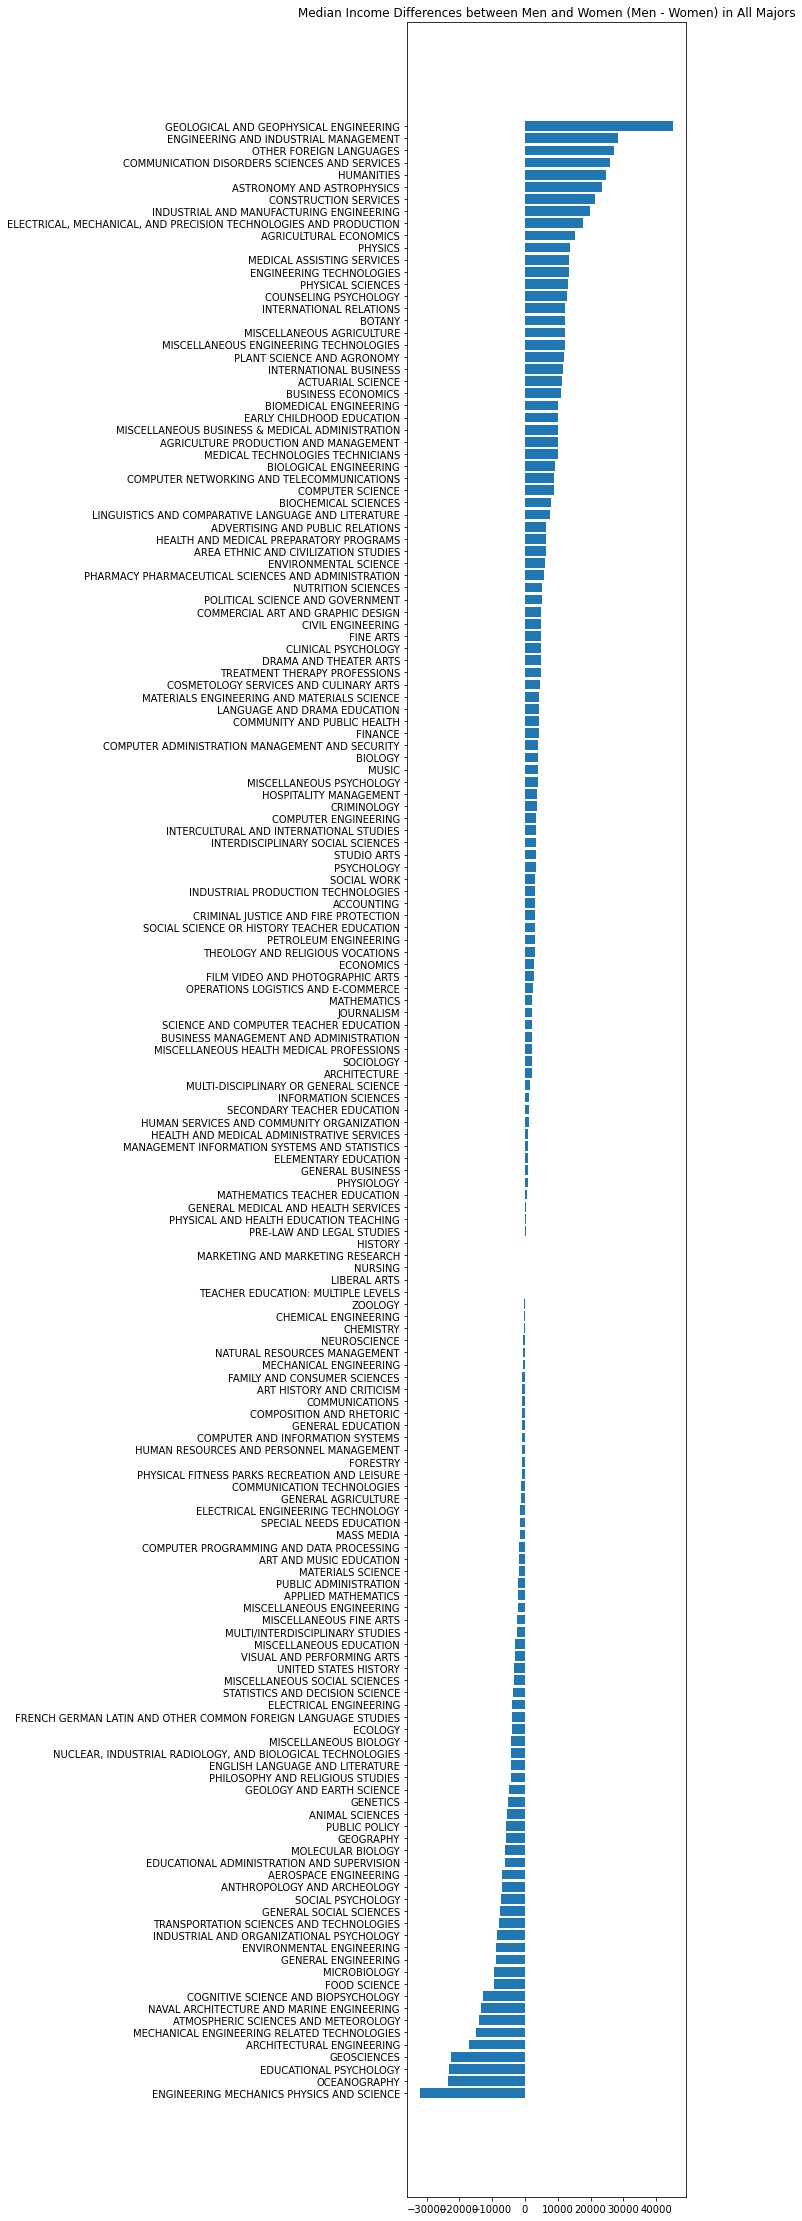

In [8]:
gt.plot_gender_income_diff(2014, recent_grads)

This plot shows the median income gap (men - women) for all majors in the given year. Mechanical engineering related technologies, pharmacology, and materials science are majors with women income significantly greater than men; while food science, miscellaneous fine arts, and mathematics and computer science are the ones with men income significant greater than women. Clinical psychology, English language and literature, accounting are some of those majors with smallest gender gap in income. 

## Gender Income Differences for Major Category

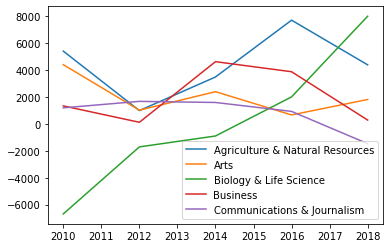

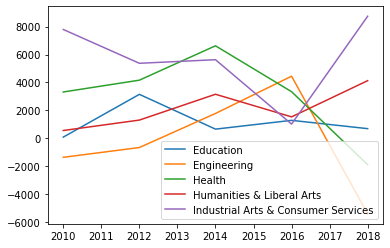

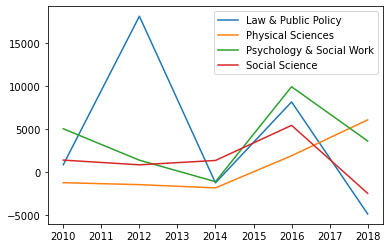

Major_Category,Agriculture & Natural Resources,Arts,Biology & Life Science,Business,Communications & Journalism,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Industrial Arts & Consumer Services,Interdisciplinary,Law & Public Policy,Physical Sciences,Psychology & Social Work,Social Science
median income diff (men - women),5410.700000,4403.500,-6690.071429,1339.769231,1196.75,3713.636364,79.714286,-1370.535714,3314.833333,552.666667,7796.833333,-1976.0,887.2,-1197.300000,5057.666667,1421.333333
median income diff (men - women),992.200000,1022.250,-1707.857143,121.538462,1676.50,2585.727273,3145.562500,-667.407407,4162.000000,1300.333333,5372.666667,2141.0,18107.6,-1422.800000,1412.777778,876.444444
median income diff (men - women),3488.666667,2396.750,-897.692308,4627.000000,1594.50,1548.800000,651.357143,1774.500000,6626.166667,3152.466667,5630.000000,-2458.0,-1220.5,-1798.000000,-1076.555556,1382.777778
median income diff (men - women),7711.900000,668.125,2009.857143,3878.769231,930.25,6799.727273,1280.785714,4446.892857,3335.833333,1531.000000,1013.200000,10645.0,8173.4,1928.700000,9930.500000,5451.000000
median income diff (men - women),4392.000000,1816.500,8004.428571,287.230769,-1466.50,3619.000000,685.785714,-5428.384615,-1903.750000,4126.666667,8746.000000,15685.0,-4818.2,6089.222222,3640.555556,-2428.888889


In [9]:
# Creat line plots to show how gender gap in income changed for each major category over time
# This function can be found in gender_tool package
gt.plot_income_diff_category(recent_grads)

These three line plots show the trends of gender income differences for each major category. We can observe that most categories' income differences are above 0 throughout the years, which means the median earning of men are greater than women in most major categories. Also, there are more categories which had income differences decreasing, either toward zero or below zero, over time. This implies the gender gaps were becoming smaller, or favoring women. 

## Correlation Heatmap

In [10]:
# Add a column of "ShareWomen" to all dataframes, recording women ratio in all graduates.
dfs = [recent_grads_10, recent_grads_12, recent_grads_14, recent_grads_16, recent_grads_18]
for df in dfs:
    df['women_ratio'] = df['women'] / (df['men'] + df['women'])

In [11]:
# Select columns plotted by heatmap
heatmap_col = recent_grads_10[['total', 'men', 'women', 'total median', 'women median',
       'men median', 'Major', 'Major_Category', 'women_ratio']]

<AxesSubplot:>

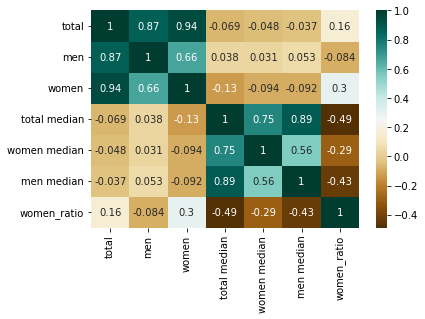

In [12]:
# Plot a heatmap showing the correlations between each columns
sns.heatmap(heatmap_col.corr(), cmap='BrBG', annot = True)

Interestingly, this heatmap shows negative correlations between women_ratio and median earning (total, women, and men). This implies the higher the ratio of women in a major, the less income would be earned by both women and men in that major. 

## Gender ratio and Median Earning

correlation coefficient between women ratio and median earning in 2010 equals to: -0.4900784927349607


/srv/conda/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.4900784927349607

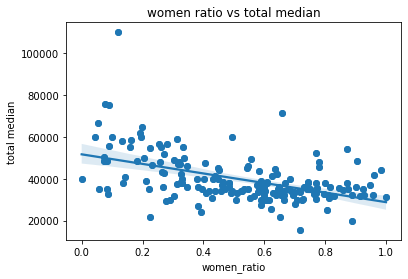

In [20]:
# Draw a scatter plot of women ratio vs. total median earning to see the correlation
gt.womenratio_median_scatter_plot(recent_grads_10, 2010)

correlation coefficient between women ratio and median earning in 2018 equals to: -0.5716854655416421


/srv/conda/envs/hw7env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


-0.5716854655416421

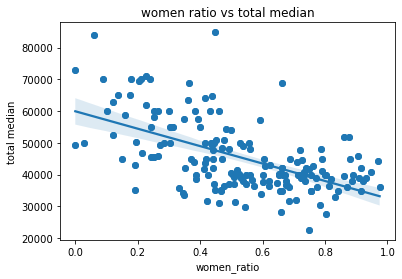

In [21]:
gt.womenratio_median_scatter_plot(recent_grads_18, 2018)

These plots compare the correlations between women ratio and total median earning in 2010 and 2018. Their respective correlation coeficients are -0.49 and -0.57, which means women ratio and total median earning were more correlated in 2018 than in 2016. 